# Data Scientist technical homework, Christian Haller

- Question 1: We’d like to know where we stand per each user’s latest [NPS] score. The feedback we’re getting from users seems to be getting increasingly positive
- Question 2: The Marketing Team have a hypothesis that brokers like DealIQ more than Admins. Can you find evidence for this?
- Question 3: We suspect users have been getting more active over time, especially on weekdays. Can you confirm or reject this idea?
- Question 4: Some users seem to use Notes and Tasks interchangeably. Can you provide any insight into which kinds of users are using which features here?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load csv into pandas, check columns, and if  there are missing values

In [2]:
# cbre_human_resources.csv contains data on the brokers, admins, and market researchers who use DealIQ
hr_df = pd.read_csv('cbre_human_resources.csv')

# harmonize column names across data frames, which makes merging later easier
hr_df = hr_df.rename(columns={"User ID": "user_id", "Role": "role", "Email Address": "email"})

hr_df.head()

,user_id,role,email
0,31101,Broker,Selene.Shilling@cbre.com
1,28499,Broker,Beverley.Burchard@cbre.com
2,67306,Admin,agueda.auten@cbre.com
3,46012,Broker,Melanie.Mccawley@cbre.com
4,14288,Admin,Akilah.Ashley@cbre.com


In [3]:
# length of data frame
print("Number of users in HR data frame: ",len(hr_df))

# check for missing values
hr_df.isnull().sum(axis = 0)

Number of users in HR data frame:  50


user_id    0
role       0
email      0
dtype: int64

In [4]:
# cbre_nps_scores.csv contains Net Promoter Scores (a 0 to 10 “How likely are you to recommend DealIQ to your friends?” score), a question we periodically ask our users.
nps_df = pd.read_csv('cbre_nps_scores.csv')

# harmonize column names across data frames, which makes merging later easier
nps_df = nps_df.rename(columns={"Date": "date", "Email": "email", "NPS Score": "nps_score"})

nps_df.head()

,Unnamed: 0,date,email,nps_score
0,0,2018-03-13,Angel.Armwood@cbre.com,7
1,1,2018-03-23,Alaine.Arjona@cbre.com,6
2,2,2018-05-06,Cheyenne.Callaghan@cbre.com,6
3,3,2018-05-24,Selene.Shilling@cbre.com,8
4,4,2018-06-05,Angel.Armwood@cbre.com,9


In [5]:
# length of data frame
print("Number of NPS scores in nps data frame: ",len(nps_df))

# check for missing values
nps_df.isnull().sum(axis = 0)

Number of NPS scores in nps data frame:  90


Unnamed: 0    0
date          0
email         0
nps_score     0
dtype: int64

In [6]:
# cbre_user_events.csv contains the tracked user events as a time-series
events_df = pd.read_csv('cbre_user_events.csv')

events_df.head()

,Unnamed: 0,timestamp,user_id,event
0,0,2018-04-03 18:06:34.479857,80780,updated_deal
1,1,2018-04-03 18:06:34.527157,28499,created_task
2,2,2018-04-03 18:06:34.569700,92705,created_note
3,3,2018-04-03 18:06:34.610989,27268,created_deal
4,4,2018-04-03 18:06:34.660069,24094,updated_deal


In [7]:
# length of data frame
print("Number of events in events data frame: ",len(events_df))

# check for missing values
events_df.isnull().sum(axis = 0)

Number of events in events data frame:  33318


Unnamed: 0    0
timestamp     0
user_id       0
event         0
dtype: int64

## Question 1: We’d like to know where we stand per each user’s latest [NPS] score. The feedback we’re getting from users seems to be getting increasingly positive

In [8]:
nps_df['date'] = pd.to_datetime(nps_df['date'])
nps_df.head()

,Unnamed: 0,date,email,nps_score
0,0,2018-03-13,Angel.Armwood@cbre.com,7
1,1,2018-03-23,Alaine.Arjona@cbre.com,6
2,2,2018-05-06,Cheyenne.Callaghan@cbre.com,6
3,3,2018-05-24,Selene.Shilling@cbre.com,8
4,4,2018-06-05,Angel.Armwood@cbre.com,9


In [9]:
print("The NPS score data frame contains {} unique emails/users.".format(len(nps_df.email.unique())))

The NPS score data frame contains 34 unique emails/users.


In [10]:
# NPS was explained to be on a range from 0 to 10. What's the range of user given user scores?
print("The lowest NPS Score recorded during the sampling interval is: {}, the highest is {}.".format(nps_df['nps_score'].min(),nps_df['nps_score'].max()))

The lowest NPS Score recorded during the sampling interval is: 3, the highest is 10.


In [11]:
# group by email addresses/user and get row IDs with latest Date
idx_latest = nps_df.groupby(['email'])['date'].transform(max) == nps_df['date']

# use IDs to extract rows
latest_df = nps_df[idx_latest]

# rename columns
latest_df = latest_df.rename(columns={"nps_score": "latest_nps_score", "date": "latest_nps_score_date", "Unnamed: 0": "latest_nps_score_id"})

# show the data frame
latest_df

,latest_nps_score_id,latest_nps_score_date,email,latest_nps_score
48,48,2018-12-08,Selene.Shilling@cbre.com,10
50,50,2018-12-15,Felica.Feiler@cbre.com,3
51,51,2018-12-16,Soon.Salls@cbre.com,7
52,52,2018-12-17,Penni.Parcell@cbre.com,10
55,55,2018-12-24,Shirl.Selander@cbre.com,9
56,56,2018-12-25,Wes.Wacker@cbre.com,8
57,57,2018-12-25,Ardath.Ascher@cbre.com,9
58,58,2018-12-26,Alaine.Arjona@cbre.com,10
59,59,2018-12-27,Pok.Phung@cbre.com,7
60,60,2018-12-28,Jaye.Janusz@cbre.com,9


In [12]:
# group by email addresses/user and get row IDs with latest Date
idx_earliest = nps_df.groupby(['email'])['date'].transform(min) == nps_df['date']

# use IDs to extract rows
earliest_df = nps_df[idx_earliest]

# rename columns
earliest_df = earliest_df.rename(columns={"nps_score": "earliest_nps_score", "date": "earliest_nps_score_date", "Unnamed: 0": "earliest_nps_score_id"})

# show the data frame
earliest_df

,earliest_nps_score_id,earliest_nps_score_date,email,earliest_nps_score
0,0,2018-03-13,Angel.Armwood@cbre.com,7
1,1,2018-03-23,Alaine.Arjona@cbre.com,6
2,2,2018-05-06,Cheyenne.Callaghan@cbre.com,6
3,3,2018-05-24,Selene.Shilling@cbre.com,8
5,5,2018-06-13,Nicholle.Navarre@cbre.com,3
6,6,2018-07-03,Kasi.Kreiner@cbre.com,7
8,8,2018-07-19,Hortense.Haden@cbre.com,6
9,9,2018-07-25,Nelia.Nishioka@cbre.com,4
10,10,2018-07-31,Willie.Wan@cbre.com,4
13,13,2018-08-21,Nenita.Noga@cbre.com,9


In [13]:
# merge the two data frames
aggregate_df = pd.merge(earliest_df, latest_df, on=['email'])

# reorder the columns
new_order = [2,0,1,3,4,5,6]
aggregate_df = aggregate_df[aggregate_df.columns[new_order]]

# iterate of table and create a series that contains the difference in NPS Score (may be cleaner with lambda??)
diff = []
for index, row in aggregate_df.iterrows():
    diff.append(row['latest_nps_score'] - row['earliest_nps_score'])
    
# add series as column
aggregate_df = aggregate_df.assign(difference=pd.Series(diff).values)

# show the data frame
aggregate_df

,email,earliest_nps_score_id,earliest_nps_score_date,earliest_nps_score,latest_nps_score_id,latest_nps_score_date,latest_nps_score,difference
0,Angel.Armwood@cbre.com,0,2018-03-13,7,66,2019-01-14,10,3
1,Alaine.Arjona@cbre.com,1,2018-03-23,6,58,2018-12-26,10,4
2,Cheyenne.Callaghan@cbre.com,2,2018-05-06,6,72,2019-01-24,9,3
3,Selene.Shilling@cbre.com,3,2018-05-24,8,48,2018-12-08,10,2
4,Nicholle.Navarre@cbre.com,5,2018-06-13,3,75,2019-01-31,9,6
5,Kasi.Kreiner@cbre.com,6,2018-07-03,7,67,2019-01-16,10,3
6,Hortense.Haden@cbre.com,8,2018-07-19,6,62,2019-01-01,6,0
7,Nelia.Nishioka@cbre.com,9,2018-07-25,4,76,2019-02-02,8,4
8,Willie.Wan@cbre.com,10,2018-07-31,4,61,2018-12-30,9,5
9,Nenita.Noga@cbre.com,13,2018-08-21,9,82,2019-02-18,10,1


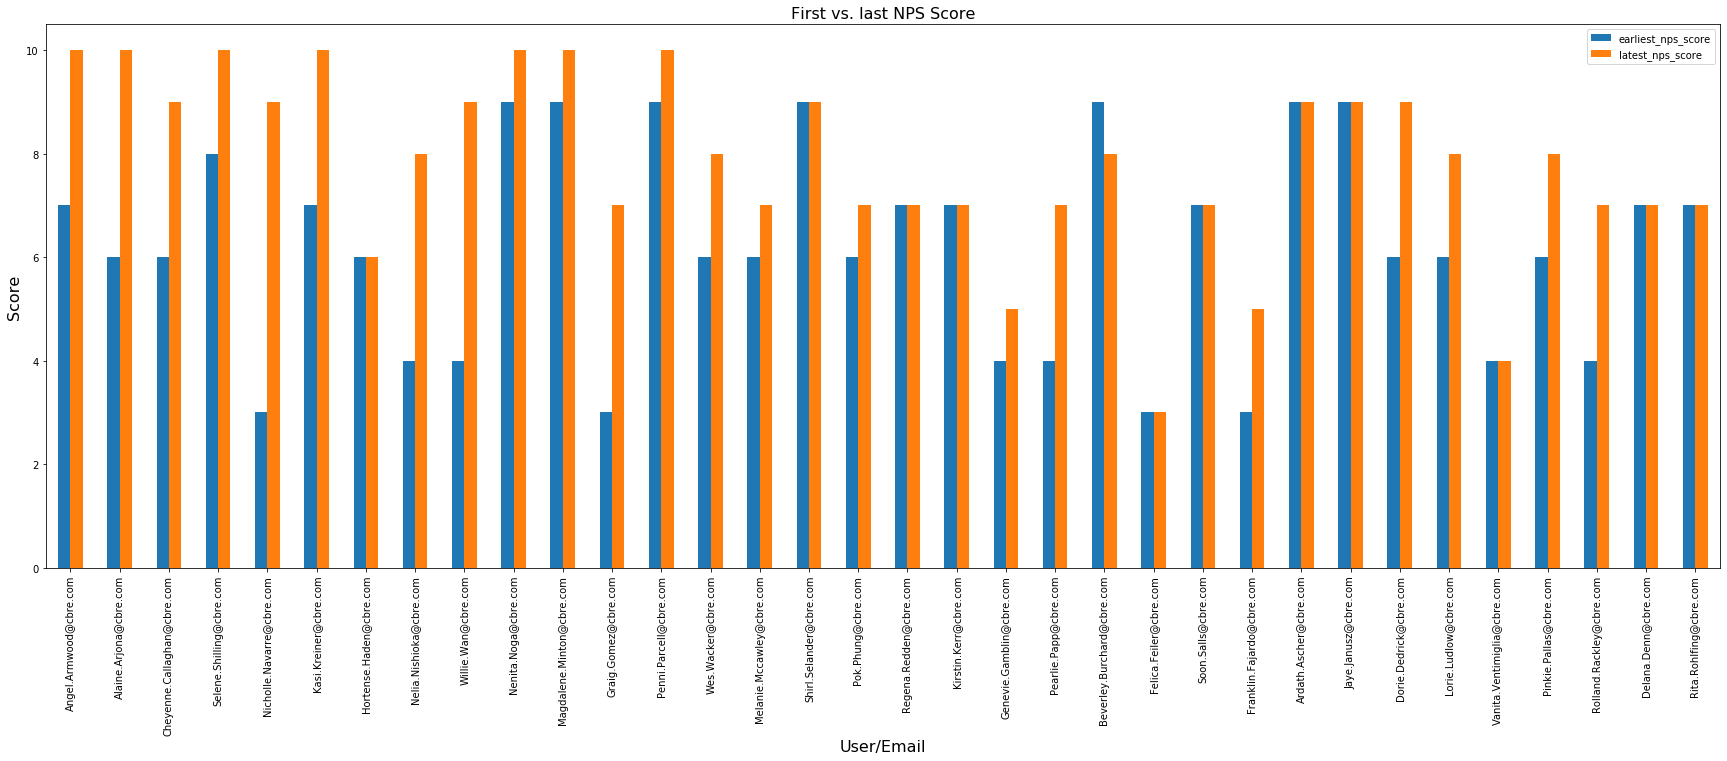

In [14]:
# bar plot of earliest and latest NPS Scores
ax = aggregate_df.plot.bar(x='email', y=['earliest_nps_score','latest_nps_score'], rot=90, figsize=(30,10))
ax.set_xlabel('User/Email', size=16)
ax.set_ylabel('Score', size=16)
ax.set_title('First vs. last NPS Score', size=16)
plt.show()

In [15]:
# did NPS socres change positively, remain equal or change negatively?
increasing = len(aggregate_df[(aggregate_df['difference']>0)])
print('Users with increasing NPS score: ',increasing)
equal = len(aggregate_df[(aggregate_df['difference']==0)])
print('Users with equal NPS score:      ',equal)
decreasing = len(aggregate_df[(aggregate_df['difference']<0)])
print('Users with decreasing NPS score:  ',decreasing)

Users with increasing NPS score:  22
Users with equal NPS score:       11
Users with decreasing NPS score:   1


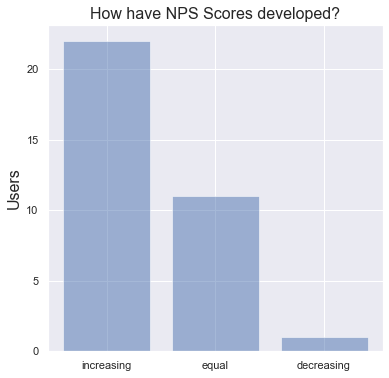

In [53]:
x_labels=['increasing','equal','decreasing']
y_values = [increasing, equal, decreasing]
y_pos = np.arange(len(y_values))

plt.figure(figsize=(6,6))
plt.bar(y_pos, y_values, align='center', alpha=0.5)
plt.xticks(y_pos, x_labels)
plt.ylabel('Users', size=16)
plt.title('How have NPS Scores developed?', size=16)

plt.show()

## Question 1 Results
NPS values are largely increasing or stayed the same during the sampled time period. Only a single user decreased their score.

---

## Question 2: The Marketing Team have a hypothesis that Brokers like DealIQ more than Admins. Can you find evidence for this?

In [17]:
# what kind of roles are there?
hr_df.role.unique()

array(['Broker', 'Admin', 'Research'], dtype=object)

In [18]:
# how many users are in each role?
print("Brokers:    ",np.sum(hr_df['role']=='Broker'))
print("Admins:     ",np.sum(hr_df['role']=='Admin'))
print("Researchers: ",np.sum(hr_df['role']=='Research'))

Brokers:     28
Admins:      19
Researchers:  3


In [19]:
# roles and scores are scattered over the hr and the nps data frames. They can be merged on the email address as done before.
rolescore_df = pd.merge(hr_df, nps_df, on=['email'])
rolescore_df

,user_id,role,email,Unnamed: 0,date,nps_score
0,31101,Broker,Selene.Shilling@cbre.com,3,2018-05-24,8
1,31101,Broker,Selene.Shilling@cbre.com,11,2018-08-04,7
2,31101,Broker,Selene.Shilling@cbre.com,22,2018-09-13,10
3,31101,Broker,Selene.Shilling@cbre.com,33,2018-10-27,10
4,31101,Broker,Selene.Shilling@cbre.com,48,2018-12-08,10
...,...,...,...,...,...,...
85,88845,Admin,Graig.Gomez@cbre.com,17,2018-08-28,3
86,88845,Admin,Graig.Gomez@cbre.com,28,2018-10-20,6
87,88845,Admin,Graig.Gomez@cbre.com,36,2018-11-04,7
88,88845,Admin,Graig.Gomez@cbre.com,85,2019-03-03,7


In [20]:
# Let's assume we only care about the latest NPS scores the users submitted
idx_latest = rolescore_df.groupby(['email'])['date'].transform(max) == rolescore_df['date']

# use IDs to extract rows
rolescore_latest_df = rolescore_df[idx_latest]
rolescore_latest_df

,user_id,role,email,Unnamed: 0,date,nps_score
4,31101,Broker,Selene.Shilling@cbre.com,48,2018-12-08,10
6,28499,Broker,Beverley.Burchard@cbre.com,68,2019-01-19,8
8,46012,Broker,Melanie.Mccawley@cbre.com,71,2019-01-24,7
13,52160,Admin,Nicholle.Navarre@cbre.com,75,2019-01-31,9
18,38443,Broker,Angel.Armwood@cbre.com,66,2019-01-14,10
20,48689,Admin,Genevie.Gamblin@cbre.com,87,2019-03-09,5
23,92705,Broker,Penni.Parcell@cbre.com,52,2018-12-17,10
25,65369,Admin,Franklin.Fajardo@cbre.com,69,2019-01-19,5
28,51175,Broker,Magdalene.Minton@cbre.com,65,2019-01-12,10
32,90531,Broker,Alaine.Arjona@cbre.com,58,2018-12-26,10


### Average NPS Scores - All Roles

In [21]:
# What's the overall NPS Score mean?
overall_mean = np.round(np.mean(rolescore_latest_df['nps_score']), decimals=2)
print("The NPS Score mean for all roles is: ",overall_mean)

The NPS Score mean for all roles is:  7.82


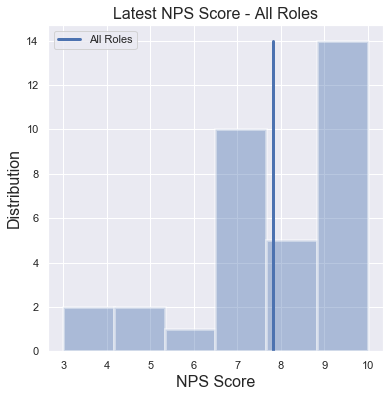

In [22]:
sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(rolescore_latest_df['nps_score'], hist_kws={"linewidth":3}, kde=False, rug=False)
# plot the mean as vertical line
plt.plot([overall_mean, overall_mean], [0, 14], linewidth=3, color='b')

plt.legend(loc='upper left', labels=['All Roles'])
plt.title('Latest NPS Score - All Roles', fontsize=16)
plt.xlabel('NPS Score', fontsize=16)
plt.ylabel('Distribution', fontsize=16)
plt.show()

### Average NPS Scores by role

In [23]:
# the short way: group by role and calculate the NPS Score mean for the groups
round(rolescore_latest_df.groupby('role')['nps_score'].mean(),2)

role
Admin       6.40
Broker      8.62
Research    7.00
Name: nps_score, dtype: float64

In [24]:
# the long way: create separate dataframes and calculate means
gb = rolescore_latest_df.groupby(['role'])
admins_df = gb.get_group('Admin')
admins_mean = np.round(np.mean(admins_df['nps_score']), decimals=2)
print("Admins mean: ", admins_mean)
broker_df = gb.get_group('Broker')
broker_mean = np.round(np.mean(broker_df['nps_score']), decimals=2)
print("Broker mean: ", broker_mean)
research_df = gb.get_group('Research')
research_mean = np.round(np.mean(research_df['nps_score']), decimals=2)
print("Researcher mean: ", research_mean)

Admins mean:  6.4
Broker mean:  8.62
Researcher mean:  7.0


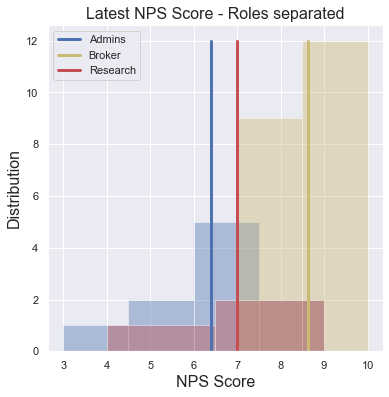

In [25]:
# create a histogram plot for each role and plot the average as vertical line

sns.set(rc={'figure.figsize':(6,6)})
sns.distplot(admins_df[['nps_score']], kde=False, rug=False, hist_kws={'color':'b'})
plt.plot([admins_mean, admins_mean], [0, 12], linewidth=3, color='b')

sns.distplot(broker_df[['nps_score']], kde=False, rug=False, hist_kws={'color':'y'})
plt.plot([broker_mean, broker_mean], [0, 12], linewidth=3, color='y')

sns.distplot(research_df[['nps_score']], kde=False, rug=False, hist_kws={'color':'r'})
plt.plot([research_mean, research_mean], [0, 12], linewidth=3, color='r')

plt.legend(loc='upper left', labels=['Admins', 'Broker', 'Research'])
plt.title('Latest NPS Score - Roles separated', fontsize=16)
plt.xlabel('NPS Score', fontsize=16)
plt.ylabel('Distribution', fontsize=16)
plt.show()

## Question 2 Results
The marketing department is right with their hypothesis. Brokers have on average a higher NPS (8.6 of 10) than Admins (6.4 of 10).

---

## Question 3: We suspect users have been getting more active over time, especially on weekdays. Can you confirm or reject this idea?
Let's visualize and create a regression on the raw data and see what changes after a cleanup

In [26]:
# for this question, the events data frame is required
events_df.head()

,Unnamed: 0,timestamp,user_id,event
0,0,2018-04-03 18:06:34.479857,80780,updated_deal
1,1,2018-04-03 18:06:34.527157,28499,created_task
2,2,2018-04-03 18:06:34.569700,92705,created_note
3,3,2018-04-03 18:06:34.610989,27268,created_deal
4,4,2018-04-03 18:06:34.660069,24094,updated_deal


In [27]:
# how big is the data frame?
print("rows: {}, columns: {}.".format(events_df.shape[0], events_df.shape[1]))

rows: 33318, columns: 4.


The events need to be summarized to a daily count.

In [28]:
# convert timestamp column into pandas datetime object
s = pd.to_datetime(events_df['timestamp'])

# group by day and count events
eventscount_df = s.groupby(s.dt.floor('d')).size().reset_index(name='events_per_day')

# add column with text repesentation of weekday
eventscount_df['day_of_week_text'] = eventscount_df['timestamp'].dt.day_name()

# add column with numerical representation of weekday
eventscount_df['day_of_week_num'] = eventscount_df['timestamp'].dt.dayofweek

# simple moving average
#window = 7
#eventscount_df['moving_average'] = eventscount_df.iloc[:,1].rolling(window=window).mean().round(1)

# add an index later for plots and regressions that cannot deal with the timestamp object
eventscount_df['index'] = eventscount_df.reset_index().index

eventscount_df

,timestamp,events_per_day,day_of_week_text,day_of_week_num,index
0,2018-04-03,209,Tuesday,1,0
1,2018-04-04,59,Wednesday,2,1
2,2018-04-05,72,Thursday,3,2
3,2018-04-06,99,Friday,4,3
4,2018-04-07,92,Saturday,5,4
...,...,...,...,...,...
354,2019-03-23,49,Saturday,5,354
355,2019-03-24,46,Sunday,6,355
356,2019-03-25,4,Monday,0,356
357,2019-03-26,5,Tuesday,1,357


In [29]:
# statistical properties of events_per_day
eventscount_df['events_per_day'].describe()

count    359.000000
mean      92.807799
std       35.118146
min        4.000000
25%       69.000000
50%       91.000000
75%      115.000000
max      229.000000
Name: events_per_day, dtype: float64

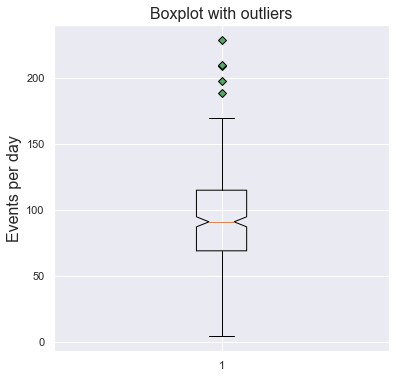

In [30]:
# boxplot with outliers
green_diamond = dict(markerfacecolor='g', marker='D')
fig, ax = plt.subplots()
ax.set_title('Boxplot with outliers', size=16)
ax.set_ylabel('Events per day', size=16)
ax.boxplot(eventscount_df['events_per_day'], notch=True, flierprops=green_diamond)
plt.show()

The majority of outliers seem to be on the higher end.

### Visualize the raw data

y = m * x + b
y = [-0.02050207] * x + 96.47766945218198


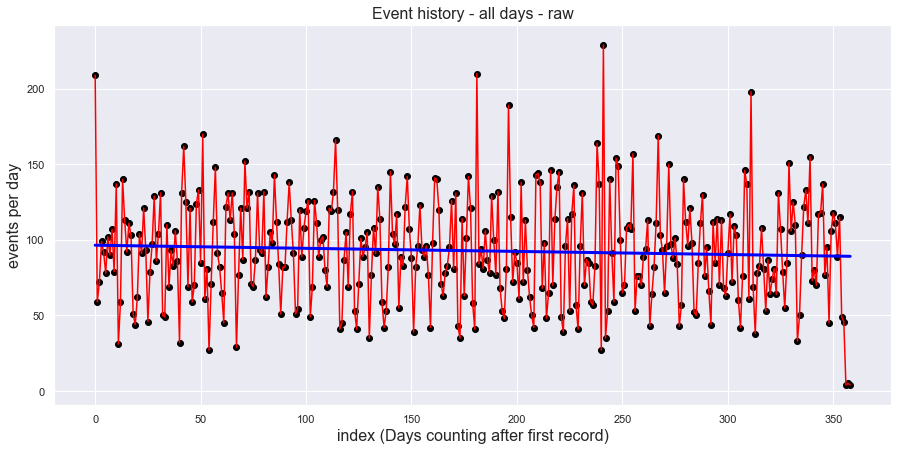

In [31]:
# note: sklearn models do not go well with timestamp data. The index integer had to be used to run and display the model.

from sklearn import linear_model

plt.figure(figsize=(15,7)) 
plt.plot(eventscount_df['index'], eventscount_df['events_per_day'], color='red')
#plt.plot(eventscount_df['index'], eventscount_df['moving_average'], color='green')
plt.scatter(eventscount_df['index'], eventscount_df['events_per_day'], color='black')

# linear fit
x = eventscount_df[['index']]
y = eventscount_df['events_per_day']

reg = linear_model.LinearRegression()
reg.fit(x, y)
y_pred = reg.predict(x)
plt.plot(x, y_pred, color='blue', linewidth=3)
print('y = m * x + b\ny = {} * x + {}'.format(reg.coef_,reg.intercept_))

plt.title('Event history - all days - raw', fontsize=16)
plt.xlabel('index (Days counting after first record)', fontsize=16)
plt.ylabel('events per day', fontsize=16)
plt.show()

Without any cleanup it looks like the interaction with the web app is decreasing by 0.02 events per day.

### Outlier cleanup

In [32]:
# clean up for outliers with a z score (number of standard deviations) above a threshold of 2. This is a relatively strict, more common is z = 2.

from scipy import stats

zthreshold = 2
eventscount_clean_df = eventscount_df[(np.abs(stats.zscore(eventscount_df['events_per_day'])) < zthreshold)]
print("Outliers removed: ",len(eventscount_df)-len(eventscount_clean_df))
eventscount_clean_df

Outliers removed:  12


,timestamp,events_per_day,day_of_week_text,day_of_week_num,index
1,2018-04-04,59,Wednesday,2,1
2,2018-04-05,72,Thursday,3,2
3,2018-04-06,99,Friday,4,3
4,2018-04-07,92,Saturday,5,4
5,2018-04-08,78,Sunday,6,5
...,...,...,...,...,...
351,2019-03-20,111,Wednesday,2,351
352,2019-03-21,89,Thursday,3,352
353,2019-03-22,115,Friday,4,353
354,2019-03-23,49,Saturday,5,354


y = m * x + b
y = [-0.00881206] * x + 92.63326669853598


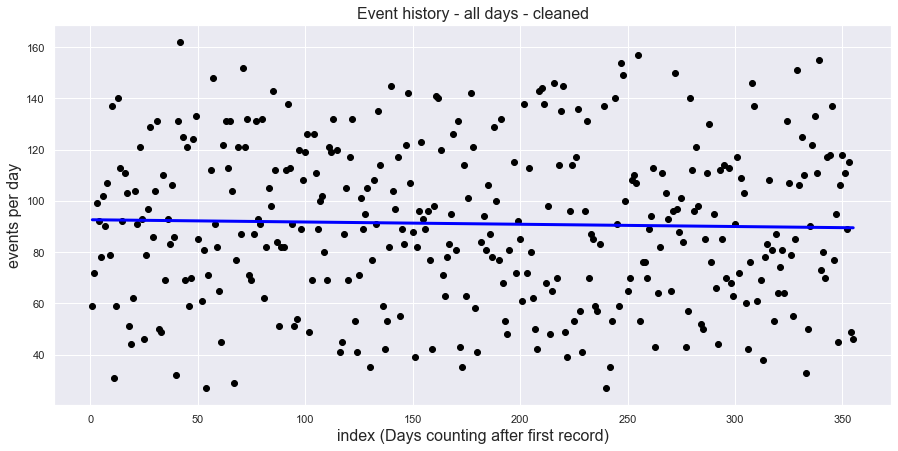

In [33]:
# plot all events post cleaning (note: we cannot create a line plot, since there are gaps between days)

plt.figure(figsize=(15,7)) 
#plt.plot(eventscount_clean_df['index'], eventscount_clean_df['events_per_day'], color='red')
plt.scatter(eventscount_clean_df['index'], eventscount_clean_df['events_per_day'], color='black')

# linear fit
x = eventscount_clean_df[['index']]
y = eventscount_clean_df['events_per_day']

reg = linear_model.LinearRegression()
reg.fit(x, y)
y_pred = reg.predict(x)
plt.plot(x, y_pred, color='blue', linewidth=3)
print('y = m * x + b\ny = {} * x + {}'.format(reg.coef_,reg.intercept_))

plt.title('Event history - all days - cleaned', fontsize=16)
plt.xlabel('index (Days counting after first record)', fontsize=16)
plt.ylabel('events per day', fontsize=16)
plt.show()

Overall, after filtering for extreme events (outliers), interaction with the web app is still declining. The slope (m coefficient) is still negative (-0.008), but not as stongly as before.

### Weekdays

In [34]:
# filter for weekdays (remove weekends)
weekdaysonly_df = eventscount_clean_df.loc[eventscount_clean_df['day_of_week_num'].isin([0,1,2,3,4])]
weekdaysonly_df

,timestamp,events_per_day,day_of_week_text,day_of_week_num,index
1,2018-04-04,59,Wednesday,2,1
2,2018-04-05,72,Thursday,3,2
3,2018-04-06,99,Friday,4,3
6,2018-04-09,102,Monday,0,6
7,2018-04-10,90,Tuesday,1,7
...,...,...,...,...,...
349,2019-03-18,106,Monday,0,349
350,2019-03-19,118,Tuesday,1,350
351,2019-03-20,111,Wednesday,2,351
352,2019-03-21,89,Thursday,3,352


y = m * x + b
y = [-0.00991698] * x + 106.22541576254908


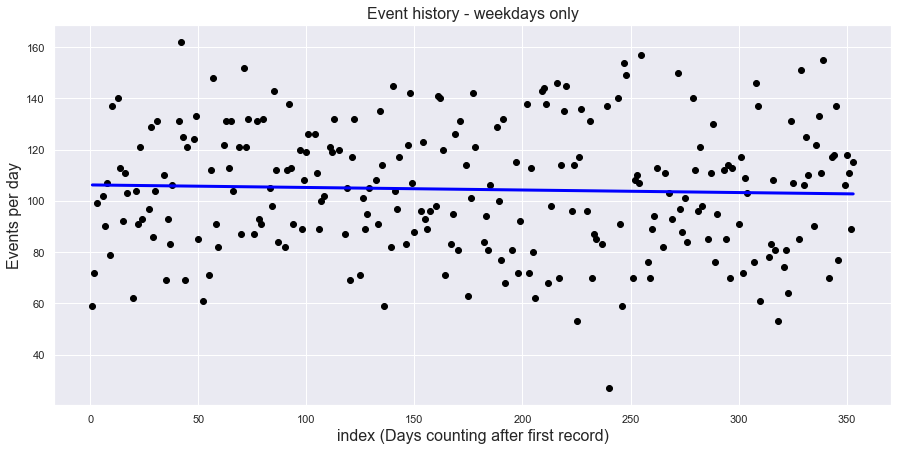

In [35]:
# plot only weekdays (note: we cannot create a line plot, since there are gaps between days)

plt.figure(figsize=(15,7))
plt.scatter(weekdaysonly_df['index'], weekdaysonly_df['events_per_day'], color='black')

# linear fit
x = weekdaysonly_df[['index']]
y = weekdaysonly_df['events_per_day']

reg = linear_model.LinearRegression()
reg.fit(x, y)
y_pred = reg.predict(x)
plt.plot(x, y_pred, color='blue', linewidth=3)
print('y = m * x + b\ny = {} * x + {}'.format(reg.coef_,reg.intercept_))

plt.title('Event history - weekdays only', fontsize=16)
plt.xlabel('index (Days counting after first record)', fontsize=16)
plt.ylabel('Events per day', fontsize=16)
plt.show()

The slope (m coefficient) for weekdays is negative (-0.009).

### Weekends

In [36]:
# filter for weekends (remove weekdays)
weekendsonly_df = eventscount_clean_df.loc[eventscount_clean_df['day_of_week_num'].isin([5,6])]
weekendsonly_df

,timestamp,events_per_day,day_of_week_text,day_of_week_num,index
4,2018-04-07,92,Saturday,5,4
5,2018-04-08,78,Sunday,6,5
11,2018-04-14,31,Saturday,5,11
12,2018-04-15,59,Sunday,6,12
18,2018-04-21,51,Saturday,5,18
...,...,...,...,...,...
341,2019-03-10,80,Sunday,6,341
347,2019-03-16,95,Saturday,5,347
348,2019-03-17,45,Sunday,6,348
354,2019-03-23,49,Saturday,5,354


y = m * x + b
y = [0.00243553] * x + 58.43537097735101


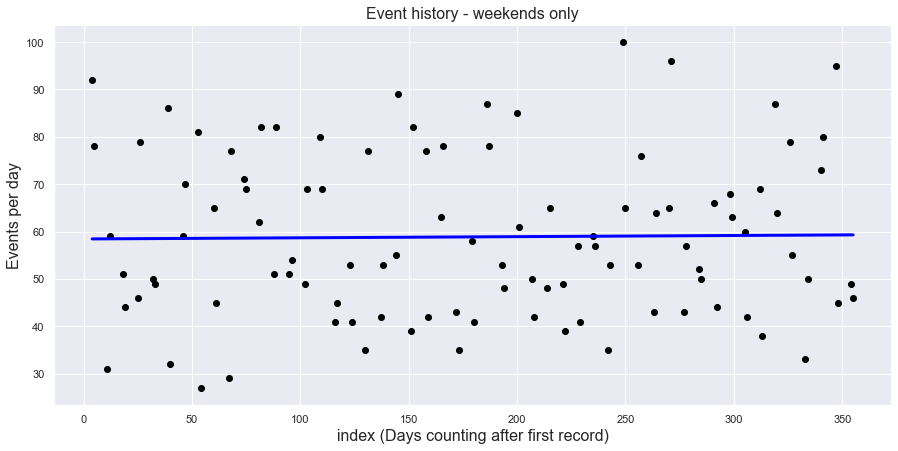

In [37]:
# plot only weekends (note: we cannot create a line plot, since there are gaps between the days)
plt.figure(figsize=(15,7)) 
plt.scatter(weekendsonly_df['index'], weekendsonly_df['events_per_day'], color='black')

# linear fit
x = weekendsonly_df[['index']]
y = weekendsonly_df['events_per_day']

reg = linear_model.LinearRegression()
reg.fit(x, y)
y_pred = reg.predict(x)
plt.plot(x, y_pred, color='blue', linewidth=3)
print('y = m * x + b\ny = {} * x + {}'.format(reg.coef_,reg.intercept_))

plt.title('Event history - weekends only', fontsize=16)
plt.xlabel('index (Days counting after first record)', fontsize=16)
plt.ylabel('Events per day', fontsize=16)
plt.show()

## Question 3 Results

A total of 12 outliers were removed. Amongst them were particularly busy days (for unknown reasons) and very slow days at the end of the sampling interval (server maintenance?).

Weekdays show a negative trend in DealIQ activity over the sampled time frame. Weekends are much less active, but remained stable (very slightly positive slope of trendline).

We can safely reject the idea that users were getting more active over time, especially on weekdays.

---

## Question 4: Some users seem to use Notes and Tasks interchangeably. Can you provide any insight into which kinds of users are using which features here?

This task that we assign each event the role of the user. Merge the events data frame (containing events) and the hr data frame (containing roles) on the user ID.

In [38]:
# remember the events data frame with the events
events_df.head()

,Unnamed: 0,timestamp,user_id,event
0,0,2018-04-03 18:06:34.479857,80780,updated_deal
1,1,2018-04-03 18:06:34.527157,28499,created_task
2,2,2018-04-03 18:06:34.569700,92705,created_note
3,3,2018-04-03 18:06:34.610989,27268,created_deal
4,4,2018-04-03 18:06:34.660069,24094,updated_deal


In [39]:
# remember the hr data frame with the roles
hr_df.head()

,user_id,role,email
0,31101,Broker,Selene.Shilling@cbre.com
1,28499,Broker,Beverley.Burchard@cbre.com
2,67306,Admin,agueda.auten@cbre.com
3,46012,Broker,Melanie.Mccawley@cbre.com
4,14288,Admin,Akilah.Ashley@cbre.com


In [40]:
# merge the two data frames
eventrole_df = pd.merge(events_df, hr_df, on=['user_id'])

# remove excess columns
eventrole_df = eventrole_df[['event','role']]

print("rows: {}, columns: {}.".format(eventrole_df.shape[0],eventrole_df.shape[1]))
eventrole_df.head()

rows: 35524, columns: 2.


,event,role
0,updated_deal,Broker
1,checked_commissions,Broker
2,created_deal,Broker
3,updated_deal,Broker
4,shared_note,Broker


In [41]:
# create group object and group by roles
grouped_roles_df = eventrole_df.groupby('role')

### Which roles were the most productive on average?

In [42]:
# count all events per role from group object
events_per_role = grouped_roles_df['event'].count()
events_per_role = events_per_role.sort_index()

# count the number of users in each role
users_per_role = hr_df['role'].value_counts()
users_per_role = users_per_role.sort_index()

round(events_per_role/users_per_role,2)

role
Admin       729.47
Broker      706.61
Research    626.33
dtype: float64

### Which roles created how many of the events?

In [43]:
# extract event entries from group object for each role separately
Admin_df = grouped_roles_df.get_group('Admin')
Broker_df = grouped_roles_df.get_group('Broker')
Research_df = grouped_roles_df.get_group('Research')

In [44]:
# count by event type for admins. Sorting the index makes sure all three are roles in the same order
Admin_event_counts = Admin_df['event'].value_counts().sort_index()

Admin_event_counts.values

array([2572, 2632,  810,  881, 2665,  823, 2598,  879], dtype=int64)

In [45]:
# count by event type for brokers. Sorting the index makes sure all three are roles in the same order
Broker_event_counts = Broker_df['event'].value_counts().sort_index()

Broker_event_counts.values

array([4370, 1449, 4099, 1345, 1446, 1395, 1424, 4257], dtype=int64)

In [46]:
# count by event type for researchers. Sorting the index makes sure all three are roles in the same order
Research_event_counts = Research_df['event'].value_counts().sort_index()

Research_event_counts.values

array([189, 184, 207, 163, 164, 556, 194, 222], dtype=int64)

In [47]:
# save the events names in a variable for graph
events = Admin_event_counts.index.tolist()
events

['checked_commissions',
 'completed_task',
 'created_deal',
 'created_note',
 'created_task',
 'edited_note',
 'shared_note',
 'updated_deal']

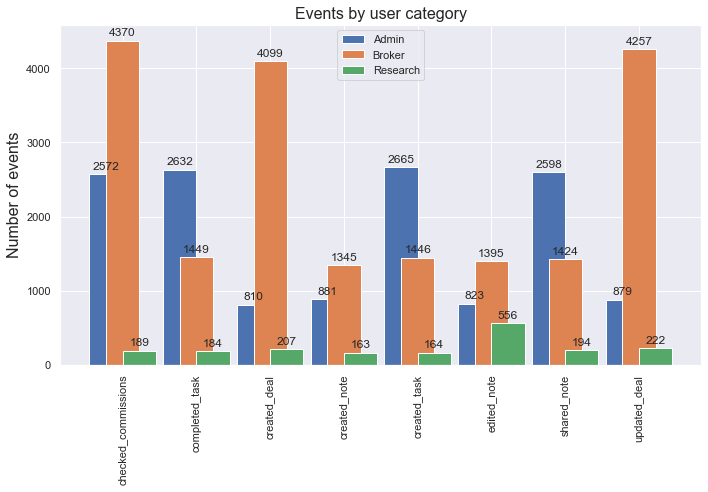

In [48]:
# the label locations
x = np.arange(len(events))  
# the width of the bars
width = 0.45  

# create bar plots
fig, ax = plt.subplots(figsize=(10,7))
rects1 = ax.bar(x - width/2, Admin_event_counts.values, width, label='Admin')
rects2 = ax.bar(x, Broker_event_counts.values, width, label='Broker')
rects3 = ax.bar(x + width/2, Research_event_counts.values, width, label='Research')

# add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of events', size=16)
ax.set_title('Events by user category', size=16)
ax.set_xticks(x)
plt.xticks(rotation='vertical')
ax.set_xticklabels(events)
ax.legend()

# define function for text label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# apply function
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
plt.show()

### Compare notes vs. task events

In [49]:
Admin_tasks = Admin_event_counts.values[1]+Admin_event_counts.values[4]
Admin_notes = Admin_event_counts.values[3]+Admin_event_counts.values[5]+Admin_event_counts.values[6]
Admin_RT_ratio = round(Admin_tasks/Admin_notes,2)
Admin_RT_ratio

1.23

In [50]:
Broker_tasks = Broker_event_counts.values[1]+Broker_event_counts.values[4]
Broker_notes = Broker_event_counts.values[3]+Broker_event_counts.values[5]+Broker_event_counts.values[6]
Broker_RT_ratio = round(Broker_tasks/Broker_notes,2)
Broker_RT_ratio

0.7

In [51]:
Research_tasks = Research_event_counts.values[1]+Research_event_counts.values[4]
Research_notes = Research_event_counts.values[3]+Research_event_counts.values[5]+Research_event_counts.values[6]
Research_RT_ratio = round(Research_tasks/Research_notes,2)
Research_RT_ratio

0.38

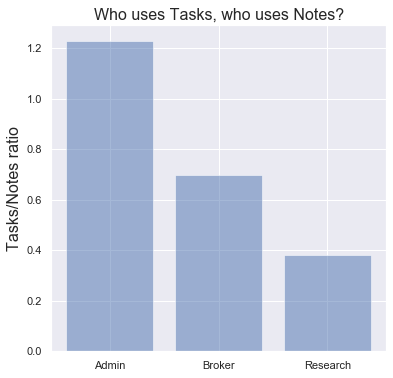

In [52]:
role_list = eventrole_df['role'].unique()
role_list.sort()
role_list.tolist()

y_pos = np.arange(len(role_list))
y_values = [Admin_RT_ratio,Broker_RT_ratio,Research_RT_ratio]

plt.figure(figsize=(6,6))
plt.bar(y_pos, y_values, align='center', alpha=0.5)
plt.xticks(y_pos, role_list)
plt.ylabel('Tasks/Notes ratio', size=16)
plt.title('Who uses Tasks, who uses Notes?', size=16)

plt.show()

## Question 4 Results

On average, Admins were the most active users during the sampled period, followed by Brokers, and Researchers.

Admins do the most: Create tasks, complete tasks, check comissions, share notes

Brokers do the most: Create deals, update deals, check comissions

Researchers do the most: Edit notes

Furthermore, Admins create more Task events than Note events, while Brokers use more Notes. Researchers majorily work with Notes.

However, there are more ways to interact with Notes (created_note, edited_note, shared_note) than with Tasks (created_task, completed_task), which may shift the event count towards Notes.